* Tom Brady
* Drew Brees

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlopen
from bs4 import BeautifulSoup

import re

%matplotlib inline

In [5]:
# qbs = {'DrewBrees':'B/BreeDr00', 'TomBrady':'B/BradTo00', 'MichaelVick':'V/VickMi00', 'PeytonManning':'M/MannPe00', 
#        'AaronRodgers':'R/RodgAa00', 'MathewStafford':'S/StafMa00', 'RusselWilson':'W/WilsRu00'}

# for qb_name, qb_ext in qbs.items():
#     # Define URL
#     qb_url = 'https://www.pro-football-reference.com/players/' + qb_ext + '.htm'
    
#     # Open url and pass into BeautifulSoup
#     html = urlopen(qb_url)
#     qb_stat_page = BeautifulSoup(html)
    

In [38]:
# # Define URL's
# brees_url = 'https://www.pro-football-reference.com/players/B/BreeDr00.htm'
# brady_url = 'https://www.pro-football-reference.com/players/B/BradTo00.htm'

# # Open url and pass into BeautifulSoup
# brady_html = urlopen(brady_url)
# brady_stats_page = BeautifulSoup(brady_html)

# # Collect table headers
# brady_column_headers = brady_stat_page.findAll('tr')[18]
# brady_column_headers = [i.getText() for i in brady_column_headers.findAll('th')]

# # Make column names lowercase
# for i in range(len(brady_column_headers)):
#     brady_column_headers[i] = brady_column_headers[i].lower()
    
# # Collect table rows
# brady_rows = brady_stats_page.findAll('tr')[19:]

# # Get stats from each row
# brady_stats = []
# for i in range(len(brady_rows)):
#     brady_stats.append([col.getText() for col in brady_rows[i].findAll('td')])
    
# brady_df = pd.DataFrame(brady_stats, columns=brady_column_headers)

In [256]:
# Read in the main dataframes
brady_df = pd.read_csv('data/brady.csv')
brees_df = pd.read_csv('data/brees.csv')

In [257]:
brady_df.head()

,Year,Age,Tm,Pos,No.,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,AV
0,2000,23,NWE,NaN,12,1,0,NaN,1,3,...,42.4,NaN,0,0,0.0,2.00,2.00,NaN,NaN,0.0
1,2001*,24,NWE,QB,12,15,14,11-3-0,264,413,...,86.5,NaN,41,216,9.0,5.79,5.39,3.0,3.0,12.0
2,2002,25,NWE,QB,12,16,16,9-7-0,373,601,...,85.7,NaN,31,190,4.9,5.66,5.54,2.0,3.0,13.0
3,2003,26,NWE,QB,12,16,16,14-2-0,317,527,...,85.9,NaN,32,219,5.7,6.08,5.94,3.0,5.0,11.0
4,2004*,27,NWE,QB,12,16,16,14-2-0,288,474,...,92.6,NaN,26,162,5.2,7.06,6.92,0.0,1.0,16.0


In [258]:
brees_df.head(6)

,Year,Age,Tm,Pos,No.,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,AV
0,2001,22,SDG,NaN,9,1,0,NaN,15,27,...,94.8,NaN,2,12,6.9,7.21,7.90,NaN,NaN,1
1,2002,23,SDG,QB,9,16,16,8-8-0,320,526,...,76.9,NaN,24,180,4.4,5.64,4.95,2.0,4.0,10
2,2003,24,SDG,QB,9,11,11,2-9-0,205,356,...,67.5,NaN,21,178,5.6,5.12,3.91,0.0,1.0,6
3,2004*,25,SDG,QB,9,15,15,11-4-0,262,400,...,104.8,NaN,18,131,4.3,7.24,7.78,1.0,2.0,17
4,2005,26,SDG,QB,9,16,16,9-7-0,323,500,...,89.2,NaN,27,223,5.1,6.36,5.99,2.0,2.0,15
5,2006*+,27,NOR,QB,9,16,16,10-6-0,356,554,...,96.2,66.7,18,105,3.1,7.54,7.58,1.0,2.0,15


In [259]:
# Drop the ESPN QBR column (the Rate column is a better use of QBR) and AV column
brady_df.drop(['QBR','AV'], axis=1, inplace=True)
brees_df.drop(['QBR','AV'], axis=1, inplace=True)

In [260]:
# Remove rows where the QB has started in less than a majority of the season (10 games)
brady_df = brady_df[brady_df.GS>10]
brees_df = brees_df[brees_df.GS>10]

In [261]:
# Check for any missing values
# brady_df.isna().sum(), brees_df.isna().sum()

In [262]:
# Adjust QB records to win, loss, win percentage columns (neither qb has a tie on their record)  
def split_win_loss(df):
    df['Win'] = df['QBrec'].str.split('-').str[0].astype(int)
    df['Loss'] = df['QBrec'].str.split('-').str[1].astype(int)
    df['WinPercentage'] = round(df.Win/(df.Win+df.Loss) * 100, 2)
    df.drop('QBrec',axis=1,inplace=True)
    return df
    

In [263]:
brady_df = split_win_loss(brady_df)
brees_df = split_win_loss(brees_df)

In [264]:
# Create all first team all pro and probowl selction columns replace year with just year
def split_pro_selections(df):
    df['AllPro'] = df['Year'].str.contains('\+')
    df['ProBowl'] = df['Year'].str.contains('\*')
    df['Year'] = df['Year'].str[0:4].astype(int)
    return df

In [265]:
brady_df = split_pro_selections(brady_df)
brees_df = split_pro_selections(brees_df)

In [266]:
brees_df.head()

,Year,Age,Tm,Pos,No.,G,GS,Cmp,Att,Cmp%,...,Sk%,NY/A,ANY/A,4QC,GWD,Win,Loss,WinPercentage,AllPro,ProBowl
1,2002,23,SDG,QB,9,16,16,320,526,60.8,...,4.4,5.64,4.95,2.0,4.0,8,8,50.00,False,False
2,2003,24,SDG,QB,9,11,11,205,356,57.6,...,5.6,5.12,3.91,0.0,1.0,2,9,18.18,False,False
3,2004,25,SDG,QB,9,15,15,262,400,65.5,...,4.3,7.24,7.78,1.0,2.0,11,4,73.33,False,True
4,2005,26,SDG,QB,9,16,16,323,500,64.6,...,5.1,6.36,5.99,2.0,2.0,9,7,56.25,False,False
5,2006,27,NOR,QB,9,16,16,356,554,64.3,...,3.1,7.54,7.58,1.0,2.0,10,6,62.50,True,True


## Completion Percentage Comparrison

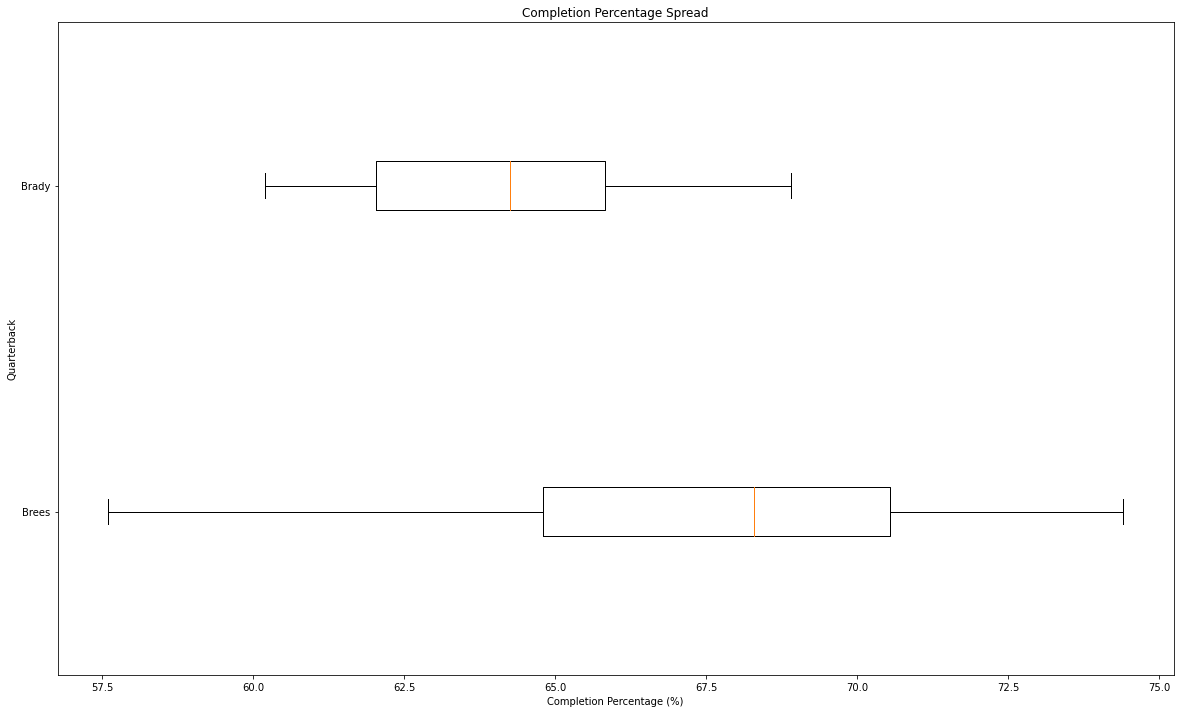

In [255]:
fig, ax = plt.subplots(figsize=(20,12))

ax.boxplot([brees_df['Cmp%'], brady_df['Cmp%']], vert=False, labels=['Brees', 'Brady']);
plt.title('Completion Percentage Spread');
plt.xlabel('Completion Percentage (%)');
plt.ylabel('Quarterback');


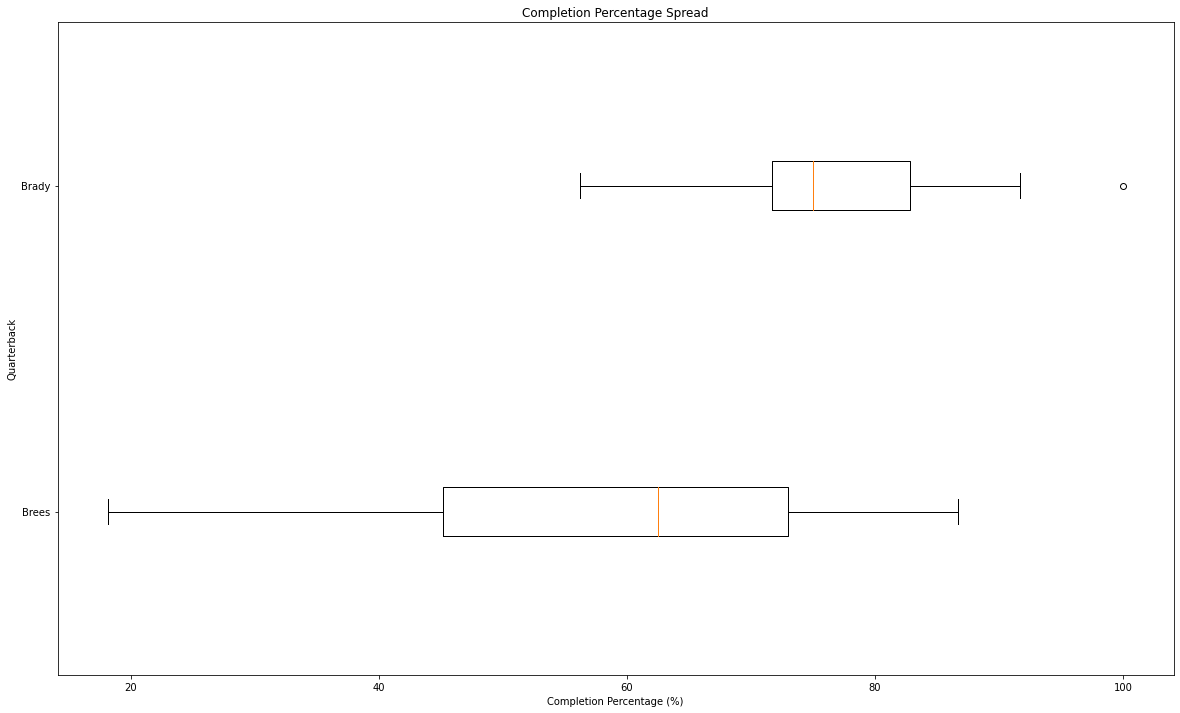

In [289]:
fig, ax = plt.subplots(figsize=(20,12))
ax.boxplot([brees_df.WinPercentage, brady_df.WinPercentage], vert=False, labels=['Brees', 'Brady']);
plt.title('Completion Percentage Spread');
plt.xlabel('Completion Percentage (%)');
plt.ylabel('Quarterback');


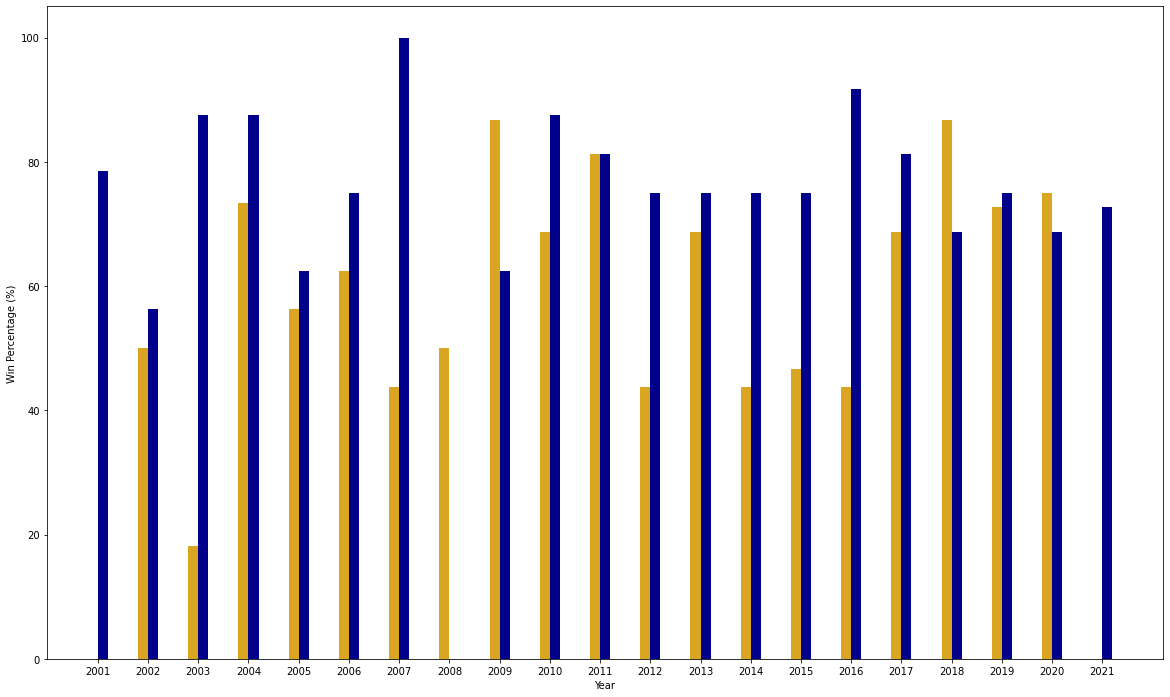

In [286]:
fig, ax = plt.subplots(figsize=(20,12))
ax.bar(x=brees_df.Year-0.1, height=brees_df.WinPercentage, width=0.2, color='goldenrod')
ax.bar(x=brady_df.Year+0.1, height=brady_df.WinPercentage, width=0.2, color='darkblue')
plt.xticks(list(set(brees_df.Year).union(brady_df.Year)))
plt.xlabel('Year');
plt.ylabel('Win Percentage (%)');

In [250]:
set(brees_df.Year).union(brady_df.Year)

{2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021}

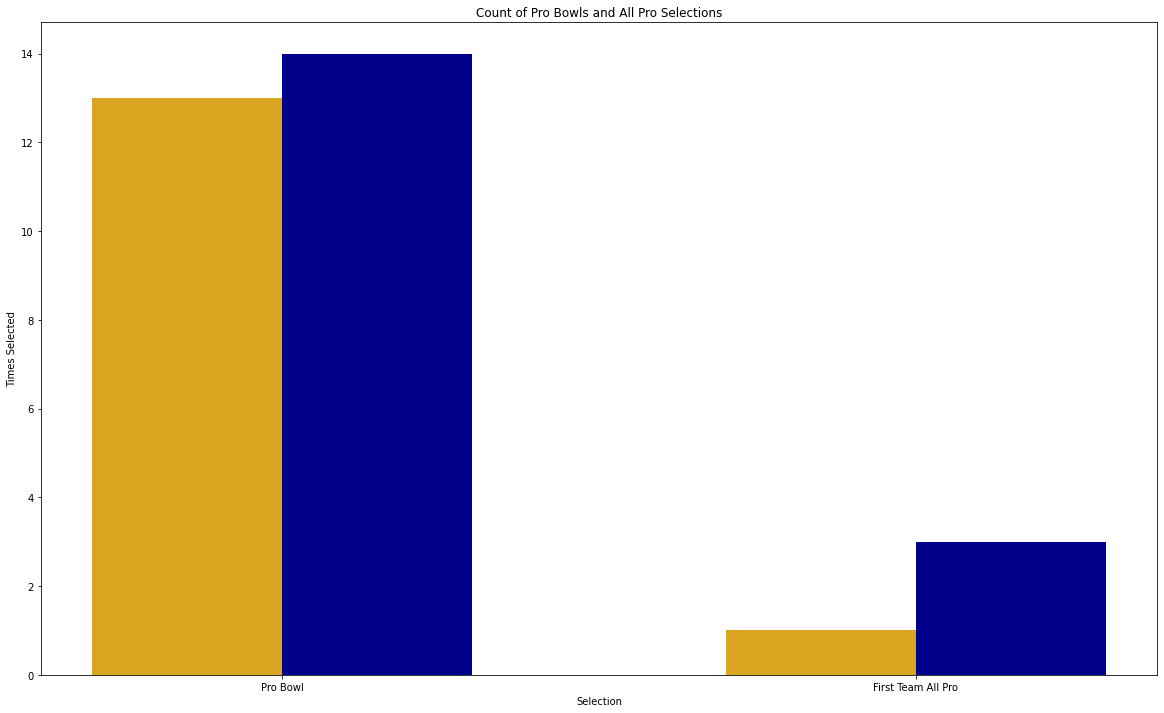

In [284]:
fig, ax = plt.subplots(figsize=(20,12))
x_axis = np.arange(2)
ax.bar(x=x_axis-0.15, height=[brees_df.ProBowl.sum(), brees_df.AllPro.sum()], width=0.3, color='goldenrod')
ax.bar(x=x_axis+0.15, height=[brady_df.ProBowl.sum(), brady_df.AllPro.sum()], width=0.3, color='darkblue')
plt.xticks(x_axis, ['Pro Bowl', 'First Team All Pro'])
plt.title('Count of Pro Bowls and All Pro Selections')
plt.xlabel('Selection');
plt.ylabel('Times Selected');

13